<a href="https://colab.research.google.com/github/ApoorvaChinta/Chennai_house_price_prediction-/blob/main/FinalProjectChennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/train-chennai-sale.csv')
#data.shape
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

CHANGING DATA TYPES

In [ ]:
mode_bed=data['N_BEDROOM'].mode()[0]
data['N_BEDROOM']=data['N_BEDROOM'].fillna(mode_bed)
data['N_BEDROOM']=data['N_BEDROOM'].astype(int)

In [ ]:
mode_bath=data['N_BATHROOM'].mode()[0]
data['N_BATHROOM']=data['N_BATHROOM'].fillna(mode_bath)
data['N_BATHROOM']=data['N_BATHROOM'].astype(int)

In [ ]:
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])

SPELLING MISTAKES 

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data['AREA']=data['AREA'].replace('Adyr','Adyar')
data['AREA']=data['AREA'].replace('Ann Nagar','Anna Nagar')
data['AREA']=data['AREA'].replace('Ana Nagar','Anna Nagar')
data['AREA']=data['AREA'].replace('Karapakam','Karapakkam')
data['AREA']=data['AREA'].replace('Velchery','Velachery')
data['AREA']=data['AREA'].replace('Chrompt','Chrompet')
data['AREA']=data['AREA'].replace('Chrmpet','Chrompet')
data['AREA']=data['AREA'].replace('Chormpet','Chrompet')
data['AREA']=data['AREA'].replace('KKNagar','KK Nagar')
data['AREA']=data['AREA'].replace('TNagar','T Nagar')
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data['SALE_COND']=data['SALE_COND'].replace('Ab Normal','AbNormal')
data['SALE_COND']=data['SALE_COND'].replace('Partiall','Partial')
data['SALE_COND']=data['SALE_COND'].replace('PartiaLl','Partial')
data['SALE_COND']=data['SALE_COND'].replace('Adj Land','AdjLand')
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data['PARK_FACIL']=data['PARK_FACIL'].replace('Noo','No')

In [ ]:
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data['BUILDTYPE']=data['BUILDTYPE'].replace('Other','Others')
data['BUILDTYPE']=data['BUILDTYPE'].replace('Comercial','Commercial')
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace('All Pub','AllPub')
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace('NoSeWa','NoSewr')
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace('NoSewr ','NoSewr')

In [ ]:
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data['STREET']=data['STREET'].replace('Pavd','Paved')
data['STREET']=data['STREET'].replace('NoAccess','No Access')
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data.drop(['QS_OVERALL','QS_BATHROOM','QS_BEDROOM','QS_ROOMS'],axis=1,inplace=True)

In [ ]:
from datetime import date
today=date.today()
today=today.strftime("%d/%m/%Y")
d1=int(today[-4:])
d1

2022

In [ ]:
data['HOUSE_AGE']=data['DATE_SALE'].dt.year-data['DATE_BUILD'].dt.year
data['HOUSE_AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: HOUSE_AGE, Length: 7109, dtype: int64

In [ ]:
data['TOTAL_PRICE']=data['REG_FEE'].add(data['COMMIS'],axis=0).add(data['SALES_PRICE'],axis=0)
data['TOTAL_PRICE']


0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: TOTAL_PRICE, Length: 7109, dtype: int64

PLOTTING ALL THE FEATURES

In [ ]:
f1=px.histogram(x=(data['AREA']),color=data['AREA'],title='Different areas in Chennai',labels={'x':'AREAS','count':'Number of properties available','color':'Areas'},
                category_orders=dict(AREAS=('T Nagar','Adya','Anna Nagar','Velachery','KK Nagar','Karapakkam','Chrompet')),text_auto=True)
f1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



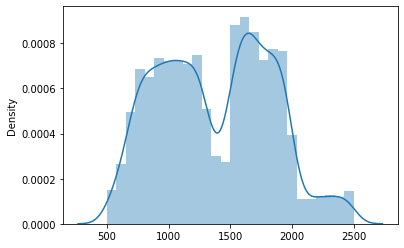

In [ ]:
f2=sns.distplot(x=data['INT_SQFT'])



In [ ]:
f3=px.histogram(x=data['N_BEDROOM'],title='No.of Bedrooms')


In [ ]:
f4=px.histogram(x=data['N_BATHROOM'])


In [ ]:
f5=px.histogram(x=data['N_ROOM'])

In [ ]:
values=data['SALE_COND']
names=data['SALE_COND']
f6=px.pie(names,values,color_discrete_sequence=px.colors.sequential.RdBu)
#f6.update_traces(text='inside',textinfo='percent+label')
f6

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



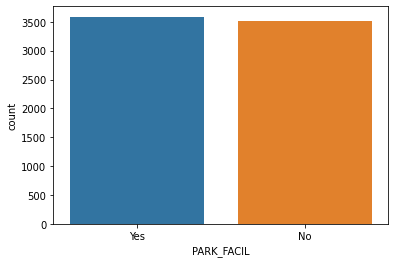

In [ ]:
f7=sns.countplot(data['PARK_FACIL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



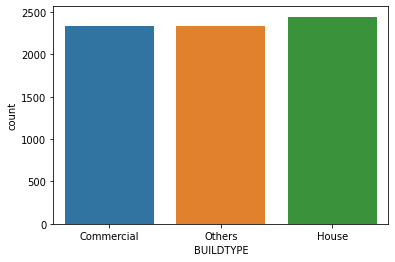

In [ ]:
f8=sns.countplot(data.BUILDTYPE)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



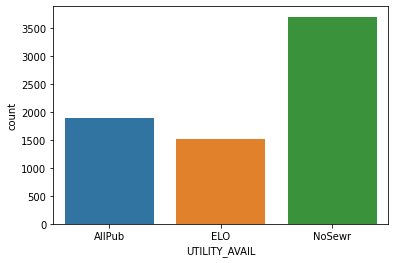

In [ ]:
f9=sns.countplot(data.UTILITY_AVAIL)

In [ ]:
f10=px.bar(x=data['STREET'],color=data['STREET'],labels={'count':'count','color':'UTILITIES','x':'UTILITIES'})
f10

In [ ]:
f11=px.bar(x=data['MZZONE'],color=data['MZZONE'],labels={'count':'count','color':'ZONES','x':'ZONES'})
f11

In [ ]:
values=data['MZZONE']
names=data['MZZONE']
f12=px.pie(names,values,color_discrete_sequence=px.colors.sequential.RdBu)
f12.update_traces(textposition='inside', textinfo='percent+label')
f12

In [ ]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
HOUSE_AGE                 int64
TOTAL_PRICE               int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


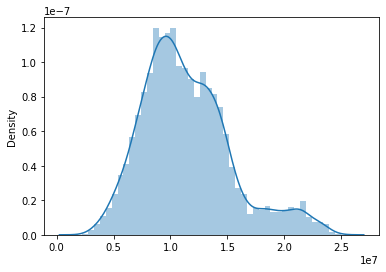

In [ ]:
sns.distplot(x=data.TOTAL_PRICE)

In [ ]:
px.histogram(x=data['HOUSE_AGE'],color=data['HOUSE_AGE'],text_auto=True)

FEATURE VS TARGET

In [ ]:
data['COST_PER_SQFT']=data['TOTAL_PRICE'].div(data['INT_SQFT'])
data['COST_PER_SQFT'].round(decimals=2)

0        8092.03
1       11471.27
2       15041.15
3        5425.15
4        6294.71
          ...   
7104     9479.64
7105     5993.79
7106     5474.47
7107    11501.20
7108     5488.12
Name: COST_PER_SQFT, Length: 7109, dtype: float64

In [ ]:
y=data.groupby(by='AREA')['COST_PER_SQFT'].mean()
y=sorted(y)
x=data.AREA.unique()
a={'AREA':x,'COST_PER_SQFT':y}
df=pd.DataFrame(a)
px.bar(df,x='AREA',y='COST_PER_SQFT',color='AREA',text_auto=True)

AREA v/s TOTAL_PRICE

In [ ]:
b=sorted(data.groupby(by='AREA')['TOTAL_PRICE'].mean())
x=data.AREA.unique()
df1=pd.DataFrame({'AREA':x,'TOTAL_PRICE':b})
px.bar(df1,x=df1['AREA'],y=df1['TOTAL_PRICE'],color='AREA')


HOUSE_AGE v/s TOTAL_PRICE

In [ ]:
df2=pd.DataFrame({'HOUSE_AGE':(data['HOUSE_AGE'].unique()),'TOTAL_PRICE':sorted(data.groupby(by='HOUSE_AGE')['TOTAL_PRICE'].mean())})
px.bar(df2,x='HOUSE_AGE',y='TOTAL_PRICE',text_auto=True)


SALE_CONDITION v/s TOTAL_PRICE

In [ ]:
df3=pd.DataFrame({'SALE_COND':(data['SALE_COND'].unique()),'TOTAL_PRICE':sorted(data.groupby(by='SALE_COND')['TOTAL_PRICE'].mean())})
px.histogram(df3,x='SALE_COND',y='TOTAL_PRICE',text_auto=True,color='SALE_COND')

In [ ]:
z=(data.groupby(by='PARK_FACIL')['TOTAL_PRICE'].mean())
q=data.PARK_FACIL.unique()
df4=pd.DataFrame({'PARK_FACIL':q,'TOTAL_PRICE':z})
df4
g1=(px.bar(df4,x='PARK_FACIL',y='TOTAL_PRICE',color='PARK_FACIL',text_auto=True))
g1.show()
#those having parkinf facility has higher price than those which are not having
a=[]
b=[]
for i in data.PARK_FACIL:
  if i=='Yes':
    a.append(i)
  else:
    b.append(i)
print('yes :',len(a))
print('no:',len(b))

yes : 3587
no: 3522


In [ ]:
g=sorted(data.groupby(by='N_ROOM')['TOTAL_PRICE'].mean())
df5=pd.DataFrame({'N_ROOM':(data['N_ROOM'].unique()),'TOTAL_PRICE':g})
px.bar(df5,x='N_ROOM',y='TOTAL_PRICE',color='N_ROOM',text_auto=True)
# linear relation

In [ ]:
df8=pd.DataFrame({'N_BEDROOM':(data['N_BEDROOM'].unique()),'TOTAL_PRICE':sorted(data.groupby(by='N_BEDROOM')['TOTAL_PRICE'].mean())})
px.bar(df8,x='N_BEDROOM',y='TOTAL_PRICE',color='N_BEDROOM',text_auto=True)
#linear relation
#sns.countplot(df8.N_BEDROOM)

In [ ]:
df6=pd.DataFrame({'DIST_MAINROAD':(data['DIST_MAINROAD'].unique()),'TOTAL_PRICE':sorted(data.groupby(by='DIST_MAINROAD')['TOTAL_PRICE'].mean())})
px.bar(df6,x='DIST_MAINROAD',y='TOTAL_PRICE',color='DIST_MAINROAD',text_auto=True)
#no proper relation not useful as a feature

In [ ]:
df7=pd.DataFrame({'MZZONE':(data['MZZONE'].unique()),'TOTAL_PRICE':sorted(data.groupby(by='MZZONE')['TOTAL_PRICE'].mean())})
px.bar(df7,x='MZZONE',y='TOTAL_PRICE',color='MZZONE',text_auto=True)

In [ ]:
df10=pd.DataFrame({'N_BATHROOM':(data['N_BATHROOM'].unique()),'TOTAL_PRICE':sorted(data.groupby(by='N_BATHROOM')['TOTAL_PRICE'].mean())})
px.bar(df10,x='N_BATHROOM',y='TOTAL_PRICE',color='N_BATHROOM',text_auto=True)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  REG_FEE        7109 n

In [ ]:
data['AREA']=le.fit_transform(data['AREA'])
data['SALE_COND']=le.fit_transform(data['SALE_COND'])
data['PARK_FACIL']=le.fit_transform(data['PARK_FACIL'])
data['BUILDTYPE']=le.fit_transform(data['BUILDTYPE'])
data['UTILITY_AVAIL']=le.fit_transform(data['UTILITY_AVAIL'])
data['MZZONE']=le.fit_transform(data['MZZONE'])
data['STREET']=le.fit_transform(data['STREET'])

SPLIT TRAIN TEST

In [ ]:
x=data[['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','MZZONE','STREET','N_ROOM','N_BATHROOM','N_BEDROOM']]
y=data['TOTAL_PRICE']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=40)

In [ ]:
from sklearn import feature_selection

originalfeatures=data.columns
print('original feature count:', len(originalfeatures))

original feature count: 21


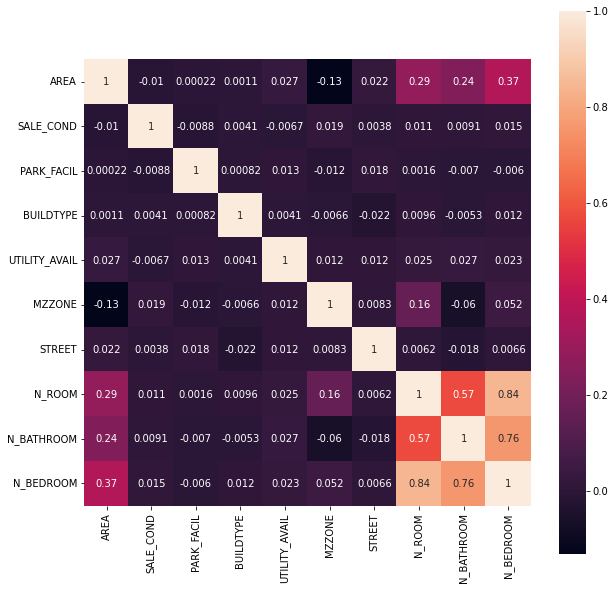

In [ ]:
plt.figure(figsize=(10,10))
correlation=x_train.corr()
sns.heatmap(correlation,annot=True,square=True)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
x_train

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,MZZONE,STREET,N_ROOM,N_BATHROOM,N_BEDROOM
2534,4,1,0,2,0,1,1,3,1,1
2929,1,3,1,0,1,4,1,4,1,1
4684,4,2,0,2,0,3,0,4,2,2
5097,4,2,1,0,0,2,1,4,2,2
4883,1,1,1,0,0,3,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...
3064,1,3,0,1,2,5,0,4,1,1
6309,5,2,1,0,1,5,1,4,1,1
6151,6,0,1,0,1,4,1,5,2,3
6363,0,3,1,2,2,3,1,3,1,1


MODEL BUILDING



*   LINEAR REGRESSION



In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([13842002.34186655, 10389340.77071691, 12693111.25280252, ...,
       12927717.36598812, 13055523.20899113, 14418910.69639721])

In [ ]:
from sklearn import metrics
import numpy as np
print('mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean Absolute Error: 1576142.2987295797
Mean Squared Error:  3656056524224.0127
Root mean Squared error: 1912081.7252994217


In [ ]:
score=model.score(x_test,y_test)
print(score)
print(score*100,"%")

0.7821055176386505
78.21055176386506 %


SVM


In [ ]:
x=data[['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','MZZONE','STREET','N_ROOM','N_BATHROOM','N_BEDROOM']]
y=data['TOTAL_PRICE']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=40)

In [ ]:
#BUILDING THE MODEL WILL TAKE LINEAR
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [ ]:
y_hat=clf.predict(x_test)

In [ ]:
clf.score(x_test, y_test)

0.0

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor(n_estimators = 100, random_state = 0)
classifier.fit(x_train,y_train)

#model score
Random_score=classifier.score(x_test,y_test)
print('\nRandom forest model score : \t', Random_score*100,' %')

#predict y using x as input for the model
y_pred = classifier.predict(x_test)

#error metrices
from sklearn import metrics
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


Random forest model score : 	 97.22496080293601  %

Mean Absolute Error:  533564.634399239
Mean Squared Error:  465624464256.87036
Root Mean Absolute Error:  730.4550871882808


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train,y_train)

ypred = lasso.predict(x_test)
lasso_score = lasso.score(x_test,y_test)*100
print("Lasso Regression score is ",lasso_score)

Lasso Regression score is  78.21053956198425


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train,y_train)

ypred = ridge.predict(x_test)
ridge_score = ridge.score(x_test,y_test)*100
print("Ridge Regression score is ",ridge_score)

Ridge Regression score is  78.20660906612764


Decision TRee

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#fitting the model
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)

#predicting 
decisiontree_score = decisiontree.score(x_test,y_test)*100
print("Decision Tree score is",decisiontree_score)

Decision Tree score is 95.59345493117785


AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

#fitting the model
ada=AdaBoostRegressor(n_estimators=10,random_state=10)
ada.fit(x_train,y_train)

#predicting the target value
y_pred=ada.predict(x_test)

#finding the score of the model
ada_score=ada.score(x_test,y_test)
print('Ada Boost Model score is :',ada_score*100,'%')

#error metrices
from sklearn import metrics
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Ada Boost Model score is : 82.12325066709715 %

Mean Absolute Error:  1393131.1283664359
Mean Squared Error:  2999543876567.206
Root Mean Absolute Error:  1180.3097594980886


Gradient Booster

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

97.64116724479433

In [ ]:
print('Linear Regression Score', 78.21,'%')
print('SVM Score',0,'%')
print('ADA BOOST REGRESSOR Score',82,'%')
print('Random Forest Score',96.94,'%',)
print('GradientBooster Score',97.64,'%',)
print('Ridge Regression Score',78,'%',)
print('Lasso Score',78.21,'%')
print('Decision Tree',95.67,'%')
'best fit model is GradientBooster'

Linear Regression Score 78.21 %
SVM Score 0 %
ADA BOOST REGRESSOR Score 82 %
Random Forest Score 96.94 %
GradientBooster Score 97.64 %
Ridge Regression Score 78 %
Lasso Score 78.21 %
Decision Tree 95.67 %


'best fit model is GradientBooster'

Feature Importance

In [ ]:
feature_scores = pd.Series(classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

N_ROOM           36.835727
BUILDTYPE        30.810832
MZZONE           12.167665
N_BEDROOM         7.138858
AREA              6.629453
PARK_FACIL        1.754710
N_BATHROOM        1.599655
STREET            1.447816
SALE_COND         1.043444
UTILITY_AVAIL     0.571840
dtype: float64

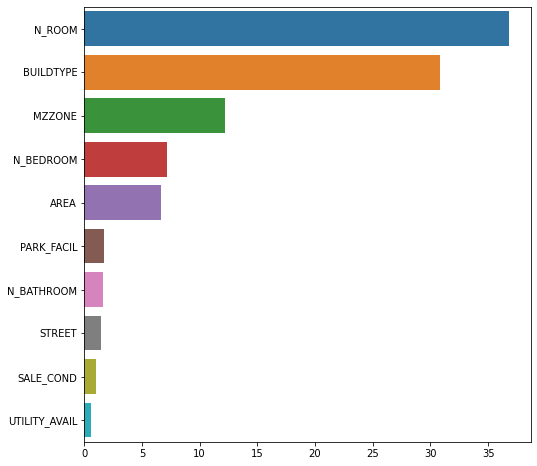

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)

Data Export

In [ ]:
import pickle


#Writing Pickle File
with open('model_pkl','wb') as f:
    pickle.dump(GradientBoosting,f)
    print("Model Saved Successfuly as model_pkl")
    print("************************************")


Model Saved Successfuly as model_pkl
************************************


In [ ]:
data.to_csv('cleaned.csv')
print("Cleaned Data Exported sucessfuly as cleaned.csv")
print("***********************************************")

Cleaned Data Exported sucessfuly as cleaned.csv
***********************************************
